# Project 2: Inference and Capital Punishment

Welcome to Project 2!  You will investigate the relationship between murder and capital punishment (the death penalty) in the United States.  By the end of the project, you should know how to:

1. Test whether observed data appears to be a random sample from a distribution
2. Analyze a natural experiment
3. Implement and interpret a sign test
4. Create a function to run a general hypothesis test
5. Analyze visualizations and draw conclusions from them

### Logistics


**Deadline.** This project is due at 11:59pm on Thursday 10/26. You can earn an early submission bonus point by submitting your completed project by Wednesday 10/25. It's **much** better to be early than late, so start working now.

**Checkpoint.** For full credit, you must also **complete Parts 1 and 2 of the project (out of 5) and submit them by 11:59pm on Friday 10/20**. You will have some lab time to work on these questions, but we recommend that you start the project before lab and leave time to finish the checkpoint afterward.

**Partners.** You may work with one other partner. It's best to work with someone in your lab. Only one of you is required to submit the project. On [okpy.org](http://okpy.org), the person who submits should also designate their partner so that both of you receive credit.

**Rules.** Don't share your code with anybody but your partner. You are welcome to discuss questions with other students, but don't share the answers. The experience of solving the problems in this project will prepare you for exams (and life). If someone asks you for the answer, resist! Instead, you can demonstrate how you would solve a similar problem.

**Support.** You are not alone! Come to office hours, post on Piazza, and talk to your classmates. If you want to ask about the details of your solution to a problem, make a private Piazza post and the staff will respond. If you're ever feeling overwhelmed or don't know how to make progress, email your TA or tutor for help. You can find contact information for the staff on the [course website](http://data8.org/sp17/staff.html).

**Tests.** Passing the tests for a question **does not** mean that you answered the question correctly. Tests usually only check that your table has the correct column labels. However, more tests will be applied to verify the correctness of your submission in order to assign your final score, so be careful and check your work!

**Advice.** Develop your answers incrementally. To perform a complicated table manipulation, break it up into steps, perform each step on a different line, give a new name to each result, and check that each intermediate result is what you expect. You can add any additional names or functions you want to the provided cells. 

All of the concepts necessary for this project are found in the textbook. If you are stuck on a particular problem, reading through the relevant textbook section often will help clarify the concept.

To get started, load `datascience`, `numpy`, `plots`, and `ok`.

In [73]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

from client.api.notebook import Notebook
ok = Notebook('project2.ok')
_ = ok.auth(inline=True)

Assignment: Project 2: Inference and Capital Punishment
OK, version v1.12.5

Successfully logged in as colinknizek@berkeley.edu


## Overview

Punishment for crime has many [philosophical justifications](http://plato.stanford.edu/entries/punishment/#ThePun).  An important one is that fear of punishment may *deter* people from committing crimes.

In the United States, some jurisdictions execute some people who are convicted of particularly serious crimes, such as murder.  This punishment is called the *death penalty* or *capital punishment*.  The death penalty is controversial, and deterrence has been one focal point of the debate.  There are other reasons to support or oppose the death penalty, but in this project we'll focus on deterrence.

The key question about deterrence is:

> Through our exploration, does instituting a death penalty for murder actually reduce the number of murders?

You might have a strong intuition in one direction, but the evidence turns out to be surprisingly complex.  Different sides have variously argued that the death penalty has no deterrent effect and that each execution prevents 8 murders, all using statistical arguments!  We'll try to come to our own conclusion.

Here is a road map for this project:

1. In section 1, we'll investigate the main dataset we'll be using.
2. In section 2, we'll see how to test null hypotheses such as this: "For this set of U.S. states, the murder rate was equally likely to go up or down each year."
3. In section 3, we'll apply a similar test to see whether U.S. states that suddenly ended or reinstituted the death penalty were more likely to see murder rates increase than decrease.
4. In section 4, we'll run some more tests to further claims we had been developing in previous sections. 
5. In section 5, we'll try to answer our question about deterrence using a visualization rather than a formal hypothesis test.

#### The data

The main data source for this project comes from a [paper](http://cjlf.org/deathpenalty/DezRubShepDeterFinal.pdf) by three researchers, Dezhbakhsh, Rubin, and Shepherd.  The dataset contains rates of various violent crimes for every year 1960-2003 (44 years) in every US state.  The researchers compiled the data from the FBI's Uniform Crime Reports.

Since crimes are committed by people, not states, we need to account for the number of people in each state when we're looking at state-level data.  Murder rates are calculated as follows:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

(Murder is rare, so we multiply by 100,000 just to avoid dealing with tiny numbers.)

In [74]:
murder_rates = Table.read_table('crime_rates.csv').select('State', 'Year', 'Population', 'Murder Rate')
murder_rates.set_format("Population", NumberFormatter)

State,Year,Population,Murder Rate
Alaska,1960,"226,167",10.2
Alaska,1961,"234,000",11.5
Alaska,1962,"246,000",4.5
Alaska,1963,"248,000",6.5
Alaska,1964,"250,000",10.4
Alaska,1965,"253,000",6.3
Alaska,1966,"272,000",12.9
Alaska,1967,"272,000",9.6
Alaska,1968,"277,000",10.5
Alaska,1969,"282,000",10.6


## 1. Murder rates

So far, this looks like a dataset that lends itself to an observational study.  In fact, the murder rates dataset isn't even enough to demonstrate an *association* between the existence of the death penalty in a state in a year and the murder rate in that state and year!

**Question 1.1.** What additional information will we need before we can check for that association? Assign `extra_info` to a Python list (i.e. [#] or [#, #, ...]) containing the number(s) for all of the additional facts below that we *require* in order to check for association.

1) What year(s) the death penalty was introduced in each state (if any).

2) Day to day data about when murders occurred.

3) What year(s) the death penalty was abolished in each state (if any).

4) Rates of other crimes in each state.

In [75]:
extra_info = [1, 3]

In [76]:
_ = ok.grade("q1_1")
_ = ok.backup()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Running tests

---------------------------------------------------------------------
Test summary
    Passed: 1
    Failed: 0
[ooooooooook] 100.0% passed



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Saving notebook... Saved 'project2.ipynb'.
Backup... 100% complete
Backup successful for user: colinknizek@berkeley.edu
URL: https://okpy.org/cal/data8/fa17/project2/backups/2kykOP
NOTE: this is only a backup. To submit your assignment, use:
	python3 ok --submit



Murder rates vary over time, and different states exhibit different trends. The rates in some states change dramatically from year to year, while others are quite stable. Let's plot a couple, just to see the variety.

**Question 1.2.** Draw a line plot with years on the horizontal axis and murder rates on the 
vertical axis. Include two lines: one for Alaska murder rates and one for Minnesota murder rates. Create this plot using a single call, `ak_mn.plot('Year')`.

*Hint*: To create two lines, you will need create the table `ak_mn` with two columns of murder rates, in addition to a column of years. This table will have the following structure:

| Year | Murder rate in Alaska | Murder rate in Minnesota |
|------|-----------------------|--------------------------|
| 1960 | 10.2                  | 1.2                      |
| 1961 | 11.5                  | 1                        |
| 1962 | 4.5                   | 0.9                      |

<center>... (41 rows omitted)</center>

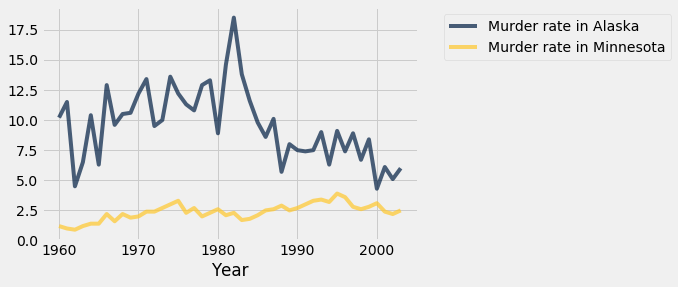

In [77]:
# The next lines are provided for you.  They create a table
# containing only the Alaska information and one containing
# only the Minnesota information.
alaska = murder_rates.where('State', 'Alaska').drop('State', 'Population').relabeled(1, 'Murder rate in Alaska')
minnesota = murder_rates.where('State', 'Minnesota').drop('State', 'Population').relabeled(1, 'Murder rate in Minnesota')
years = np.arange(1960, 2004)
# Fill in this line to make a table like the one pictured above.
alaska_minnesota = Table().with_columns(
    'Year', years,
    'Murder rate in Alaska', alaska.column('Murder rate in Alaska'),
    'Murder rate in Minnesota', minnesota.column('Murder rate in Minnesota')
)
alaska_minnesota.plot('Year')

In [78]:
np.array_equal(murder_rates.column('Year'), alaska_minnesota.column('Year'))

False

In [79]:
# This is a testing cell
def test_OnePointTwo(table):
    """ Test my solution for Question 1.2
    >>> test_OnePointTwo(ak_mn)
    """
    print('Testing my solution for Question 1.2', '\n') 
    if np.array_equal(murder_rates.where('State', 'Alaska').column('Murder Rate'), alaska_minnesota.column('Murder rate in Alaska')):
        print('Checking Alaska murder rates... PASS')
    else:
        print('Checking Alaska murder rates...FAIL')
    if np.array_equal(murder_rates.where('State', 'Minnesota').column('Murder Rate'), alaska_minnesota.column('Murder rate in Minnesota')):
        print('Checking Minnesota murder rates... PASS')
    else:
        print('Minnesota murder rates - FAIL')
    if sum(alaska_minnesota.column('Year')) == 87186:
        print('Checking for correct years... PASS')
    else:
        print('Checking for correct years... FAIL')
        print('murder rate years are ', sum(murder_rates.column('Year')) // 50) 
    
test_OnePointTwo(ak_mn)

NameError: name 'ak_mn' is not defined

In [ ]:
_ = ok.grade("q1_2")
_ = ok.backup()

Now what about the murder rates of other states? Say, for example, California and New York? Fill in the cell below to plot the murder rates of different pairs of states. **Note:** this should use similar code to question 1.2, with only the variable names changed. The cell below will not be graded, but it creates a cool interactive module!

In [ ]:
# Compare the murder rates of any two states by filling in the blanks below

from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

def state(state1, state2):
    state1_table = murder_rates.where('State', state1).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state1))
    state2_table = murder_rates.where('State', state2).drop('State', 'Population').relabeled(1, 'Murder rate in {}'.format(state2))
    s1_s2 = state1_table.join('Year', state2_table, 'Year')
    s1_s2.plot('Year')
    plots.show()

states_array = murder_rates.group('State').column('State')

_ = interact(state,
             state1=widgets.Dropdown(options=list(states_array),value='California'),
             state2=widgets.Dropdown(options=list(states_array),value='New York')
            )

##### A reminder about tests
The automated tests check for basic errors (like the number of rows in your `ak_mn` table, or whether you defined a function named `most_murderous` for the next question), but they **aren't comprehensive**.

If you're not sure that your answer is correct, think about how you can check it.  For example, if a table has the right number of rows and columns, and a few randomly-selected values from each column are correct, then you can be somewhat confident you've computed it correctly.  For the previous question, try checking some of the values in `ak_mn` manually, by searching through the `murder_rates` table.

**Question 1.3.** Implement the function `most_murderous`, which takes a year (an integer) as its argument. It does two things:
1. It draws a horizontal bar chart of the 5 states that had the highest murder rate in that year.
2. It returns an array of the names of these states in order of *increasing* murder rate.

Assume that the argument is a year in `murder_rates`. You do not need to check that it is.

In [ ]:
def most_murderous(year):
    # Assign most to a table of the most murderous states this year in ascending order.
    most = murder_rates.where('Year', year).sort('Murder Rate', descending=True).take(np.arange(4, -1, -1))
    most.barh('State', 'Murder Rate')
    return most.column('State')

most_murderous(1990) # California, Mississippi, ..., 

In [ ]:
def testOnePointThree(fn):
    """ Check to see if my solution to Question 1.3 is correct
    >>> 
    """
    # assert type(year) is int
    if max(most_murderous(1960)) == murder_rates.where('Year', 1960).sort('Murder Rate', descending=True).column('State').item(0):
        print('Checking 1960... PASS')
    else:
        print('Checking 1960... FAIL')
        print('The highest murder rate in 1960, using most_murderous, is', max(most_murderous(1960)))
        print('The true highest murder rate in 1960 was', murder_rates.where('Year', 1960).sort('Murder Rate', descending=True).column('State').item(0))
    print('\n', 'Test complete!')
    
testOnePointThree(most_murderous(1960))

# make more tests later


In [ ]:
_ = ok.grade("q1_3")
_ = ok.backup()

**Question 1.4.** How many more people were murdered in California in 1988 than in 1975? Assign `ca_change` to the answer.

*Hint*: Make sure you understand how murder rate is calculated. Recall the formula given at the beginning of the project:

$$\text{murder rate for state X in year Y} = \frac{\text{number of murders in state X in year Y}}{\text{population in state X in year Y}}*100000$$

Certain mistakes would make your answer to the previous question way too small or way too big, and the automatic tests don't check that.  Make sure your answer looks reasonable before moving on.

In [ ]:
ca = murder_rates.where('State', are.equal_to('California'))
ca_change = (((ca.where('Year', 1988).column('Murder Rate') * ca.where('Year', 1988).column('Population')) / 100000) 
           - ((ca.where('Year', 1975).column('Murder Rate') * ca.where('Year', 1975).column('Population')) / 100000)).take(0)
np.round(ca_change)

In [ ]:
# This is a testing cell.
def testOnePointFour(num):
    """ Test if ca_change is the correct value
    >>> murder_rate(state, year) = (total_murders in (state, year) / total_population in (state, year)) * 100,000 
                                
    """
    start_year = (murder_rates.where('State', 'California').where('Year', 1975).column('Murder Rate') 
                / murder_rates.where('State', 'California').where('Year', 1975).column('Population'))  * 100000
                
    end_year =  (murder_rates.where('State', 'California').where('Year', 1988).column('Murder Rate') 
               / murder_rates.where('State', 'California').where('Year', 1988).column('Population'))  * 100000

In [ ]:
_ = ok.grade('q1_4')
_ = ok.backup()

# 2. Changes in Murder Rates

In this section, we'll see how to test null hypotheses such as this: "For this set of U.S. states, the murder rate was equally likely to go up or down each year."

Murder rates vary widely across states and years, presumably due to the vast array of differences among states and across US history. Rather than attempting to analyze rates themselves, here we will restrict our analysis to whether or not murder rates increased or decreased over certain time spans. **We will not concern ourselves with how much rates increased or decreased; only the direction of the change** - whether they increased or decreased.

The `np.diff` function takes an array of values and computes the differences between adjacent items of a list or array as such:

    [item 1 - item 0 , item 2 - item 1 , item 3 - item 2, ...]

Instead, we may wish to compute the difference between items that are two positions apart. For example, given a 5-element array, we may want:

    [item 2 - item 0 , item 3 - item 1 , item 4 - item 2]
    
The `diff_n` function below computes this result. Don't worry if the implementation uses unfamiliar features of Python, as long as you understand its behavior.

In [ ]:
def diff_n(values, n):
    return np.array(values)[n:] - np.array(values)[:-n]

diff_n(make_array(1, 10, 100, 1000, 10000), 2)

**Question 2.1.** Implement the function `two_year_changes` that takes an array of murder rates for a state, ordered by increasing year. For all two-year periods (e.g., from 1960 to 1962), it computes and returns **the number of increases minus the number of decreases.**

For example, the array `r = make_array(10, 7, 12, 9, 13, 9, 11)` contains 3 increases (10 to 12, 7 to 9, and 12 to 13), 1 decrease (13 to 11), and 1 change that is neither an increase or decrease (9 to 9). Therefore, `two_year_changes(r)` would return 2, the difference between 3 increases and 1 decrease.

*Hint*: Consider using the `diff_n` function.

In [ ]:
def two_year_changes(rates):
    sorted_rates = diff_n(rates, 2)
    increasing, decreasing = 0, 0
    for rate in sorted_rates:
        if rate > 0:
            increasing += 1
        elif rate < 0:
            decreasing += 1
        else:
            pass
    return increasing - decreasing

print('Alaska:',    two_year_changes(ak.column('Murder rate in Alaska')))
print('Minnesota:', two_year_changes(mn.column('Murder rate in Minnesota')))

In [ ]:
# This is a test cell.
def testTwoPointOne():
    ca_rates = murder_rates.where('State', 'California').sort('Year', descending=False).column('Murder Rate')
    set_1 = ca_rates.take(np.arange(0, 3))
    set_2 = ca_rates.take(np.arange(0, 10))
    # ca_rates for (1960, 1962) should be (-) and (+), resulting in output of 0.
    if two_year_changes(set_1) is 0:
        print('Case #1: Pass')
    else:
        print('Case #1: Fail')
        # should be 7 for all rates
    if two_year_changes(set_2) is 7:
        print('Case #2: Pass')
    else:
        print('Case #2: Fail')
        print('The result is', two_year_changes(set_2), ',not 7')
    # test below is under development, plz ignore 
    if np.array_equal(ca_rates, two_year_changes(ca_rates)):
        print('Case #3: Pass')

testTwoPointOne()

In [ ]:
_ = ok.grade("q2_1")
_ = ok.backup()

We can use `two_year_changes` to summarize whether rates are mostly increasing or decreasing over time for some state or group of states. Let's see how it varies across the 50 US states.

**Question 2.2.** Assign `changes_by_state` to a table with one row per state that has two columns: the `State` name and the `Murder Rate two_year_changes` statistic computed across all years in our data set for that state.  Its first 2 rows should look like this:

|State|Murder Rate two_year_changes|
|-|-|
|Alabama|-6|
|Alaska|-5||

<center>... (48 rows omitted)</center>


In [ ]:
changes_by_state = murder_rates.group('State', two_year_changes).select(0, 3)
# Here is a histogram of the two-year changes for the states.
# Since there are 50 states, each state contributes 2% to one
# bar.
changes_by_state.hist("Murder Rate two_year_changes", bins=np.arange(-11, 12, 2))

In [ ]:
_ = ok.grade("q2_2")
_ = ok.backup()

Some states have more increases than decreases (a positive number), while some have more decreases than increases (a negative number). 

**Question 2.3.** Assign `total_changes` to the total increases minus the total decreases for all two-year periods and all states in our data set. For example, if the murder rate in Ohio went up 23 times and fell 17 times, the total change for Ohio would be 6. We want the total value for all the states together.

In [ ]:
total_changes = sum(changes_by_state.group('State', sum).column(1))
print('Total increases minus total decreases, across all states and years:', total_changes)

In [ ]:
_ = ok.grade("q2_3")
_ = ok.backup()

"More increases than decreases," one student exclaims, "Murder rates tend to go up across two-year periods. What dire times we live in."

"Not so fast," another student replies, "Even if murder rates just moved up and down uniformly at random, there would be some difference between the increases and decreases. There were a lot of states and a lot of years, so there were many chances for changes to happen. If state murder rates increase and decrease at random with equal probability, perhaps this difference was simply due to chance!"

**Question 2.4.** Set `num_changes` to the number of distinct two-year periods in the entire data set that could result in a change of a state's murder rate for all states. Include both those periods where a change occurred and the periods where a state's rate happened to stay the same.

For example, Alaska during 1968 to 1970 would count as one distinct two-year period - how many of these periods are there total? 

In [ ]:
num_changes = len(murder_rates.column('Murder Rate'))  - 50
# Since the last year (element) in the year array is not computed,
#    I subtracted the total number of two year periods by (num of states * 1)
num_changes

In [ ]:
_ = ok.grade("q2_4")
_ = ok.backup()

We now have enough information to perform a hypothesis test.

> **Null Hypothesis**: State murder rates increase and decrease over two-year periods as if 
"increase" or "decrease" were sampled at random from a uniform distribution, like a fair coin flip.

Murder rates can be more likely to go up or more likely to go down. Since we observed 45 more increases than decreases for all two year periods in our dataset, we formulate an alternative hypothesis in accordance with our suspicion:

> **Alternative Hypothesis**: State murder rates are more likely to increase over two-year periods.

If we had observed more decreases than increases, our alternative hypothesis would have been defined accordingly (that state murder rates are more likely to *decrease*). This is typical in statistical testing - we first observe a trend in the data and then run a hypothesis test to confirm or reject that trend.

*Technical note*: These changes in murder rates are not random samples from any population. They describe all murders in all states over all recent years. However, we can imagine that history could have been different, and that the observed changes are the values observed in only one possible world: the one that happened to occur. In this sense, we can evaluate whether the observed "total increases minus total decreases" is consistent with a hypothesis that increases and decreases are drawn at random from a uniform distribution.

*Important requirements for our test statistic:* We want to choose a test statistic for which large positive values are evidence in favor of the alternative hypothesis, and other values are evidence in favor of the null hypothesis. This is because once we've determined the direction of our alternative hypothesis, we only care about the tail in that direction. If, for example, our p-value cutoff was 5%, we'd check to see if our observed test statistic fell within the largest 5% of values in our null hypothesis distribution. 

Our test statistic should depend only on whether murder rates increased or decreased, not on the size of any change. Thus we choose:

> **Test Statistic**: The number of increases minus the number of decreases

The cell below samples increases and decreases at random from a uniform distribution 100 times. The final column of the resulting table gives the number of increases and decreases that resulted from sampling in this way. **Using `sample_from_distribution` is faster than using `sample` followed by `group` to compute the same result.**

In [ ]:
uniform = Table().with_columns(
    "Change", make_array('Increase', 'Decrease'),
    "Chance", make_array(0.5,        0.5))
uniform.sample_from_distribution('Chance', 100)

**Question 2.5.** Complete the simulation below, which samples `num_changes` increases/decreases at random many times and forms an empirical distribution of your test statistic under the null hypothesis.  Your job is to
* fill in the function `simulate_under_null`, which simulates a single sample under the null hypothesis, and
* fill in its argument when it's called below.

In [ ]:
def simulate_under_null(num_chances_to_change):
    """Simulates some number changing several times, with an equal
    chance to increase or decrease.  Returns the value of our
    test statistic for these simulated changes.
    
    num_chances_to_change is the number of times the number changes.
    """
    sample_table = Table().with_columns(
        "Change", make_array('Increase', 'Decrease'),
        "Chance", make_array(0.5,        0.5))
    result = sample_table.sample_from_distribution('Chance', num_chances_to_change).column(2)
    return np.diff(result)

uniform_samples = make_array()
for i in np.arange(5000):
    uniform_samples = np.append(uniform_samples, simulate_under_null(total_changes))

Table().with_column('Test statistic under null', uniform_samples).hist(0, bins=np.arange(-100, 400+25, 25))

In [ ]:
# This is a test cell.
def testTwoPointSix():
    if np.count_nonzero(simulate_under_null(20)) is 20:
        print('Test #1: Pass')
    else:
        print('Test #2: Fail')
        print(np.count_nonzero(simulate_under_null(20)))
        # print('num_chances_to_change is ', num_chances_to_change, 'but result is length', result.num_rows)
        
testTwoPointSix()

**Question 2.6.** Looking at this histogram, draw a conclusion about whether murder rates basically increase as often as they decrease. (Remember that we're only concerned with the *postive direction* because it supports our alternative hypothesis.) You **do not** need to compute a P-value for this question.

First, set `which_side` to `"Right"` or `"Left"` depending on which side of the histogram you need to look at to make your conclusion. 

Then, set `reject_null` to `True` if rates increase more than they decrease, and we can reject the null hypothesis. Set `reject_null` to `False` if they do not systematically increase more than they decrease.

In [ ]:
which_side = "Right"
reject_null = False

In [ ]:
_ = ok.grade("q2_6")
_ = ok.backup()

### Congratulations: Checkpoint Reached

You have reached the project checkpoint. Please submit now in order to record your progress. If you go back and revise your answers in the section above after the checkpoint is due, that's ok. Your revised answers will be graded. **However, you will only get credit for your checkpoint submission if you have passed the tests provided for every question above.**

If you are working with a partner, only one of you needs to submit. For both of you to receive credit, the person who submits must invite the other to be their partner on [okpy.org](http://okpy.org). Please invite your partner now and tell them to accept the invitation **before** the checkpoint deadline!

In [ ]:
_ = ok.submit()

# 3. The death penalty

Some US states have the death penalty, and others don't, and laws have changed over time. In addition to changes in murder rates, we will also consider whether the death penalty was in force in each state and each year.

Using this information, we would like to investigate how the death penalty affects the murder rate of a state.

**Question 3.1.** Describe this investigation in terms of an experiment. What population are we studying? What is the control group? What is the treatment group? What outcome are we measuring? Be precise!

*Write your answers below.*

- Population: Population in each of the 50 US states from 1960 to 2003.
- Control Group: Population in a state before the death penalty is implemented.
- Treatment Group: Population in a state after the death penalty is implemented.
Outcome: Whether there is a significant difference in the murder rate of a state with versus without the death penalty.

**Question 3.2.** We want to know whether the death penalty *causes* a change in the murder rate.  Why is it not sufficient to compare murder rates in places and times when the death penalty was in force with places and times when it wasn't?

There are many differing factors between places and times such that comparing them would not be sufficient to pinpoint a causational relationship. Certain states have higher murder rates than others, as do different time periods. Therefore, merely comparing the murder rate of someplace at some point when the death penalty was enforced with another when the death penalty was not enforced would not be sufficient in deducing whether or not the death penalty causes a change in the murder rate.

### A Natural Experiment

In order to attempt to investigate the causal relationship between the death penalty and murder rates, we're going to take advantage of a *natural experiment*.  A natural experiment happens when something other than experimental design applies a treatment to one group and not to another (control) group, and we have some hope that the treatment and control groups don't have any other systematic differences.

Our natural experiment is this: in 1972, a Supreme Court decision called *Furman v. Georgia* banned the death penalty throughout the US.  Suddenly, many states went from having the death penalty to not having the death penalty.

As a first step, let's see how murder rates changed before and after the court decision.  We'll define the test as follows:

> **Population:** All the states that had the death penalty before the 1972 abolition.  (There is no control group for the states that already lacked the death penalty in 1972, so we must omit them.)  This includes all US states **except** Alaska, Hawaii, Maine, Michigan, Wisconsin, and Minnesota.

> **Treatment group:** The states in that population, in the year after 1972.

> **Control group:** The states in that population, in the year before 1972.

> **Null hypothesis:** Each state's murder rate was equally likely to be higher or lower in the treatment period than in the control period.  (Whether the murder rate increased or decreased in each state was like the flip of a fair coin.)

> **Alternative hypothesis:** The murder rate was more likely to increase.

Our alternative hypothesis is in keeping with our suspicion that murder rates increase when the death penalty is eliminated.  

*Technical Note:* It's not clear that the murder rates were a "sample" from any larger population.  Again, it's useful to imagine that our data could have come out differently and to test the null hypothesis that the murder rates were equally likely to move up or down.

The `death_penalty` table below describes whether each state allowed the death penalty in 1971.

In [ ]:
non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
def had_death_penalty_in_1971(state):
    """Returns True if the argument is the name of a state that had the death penalty in 1971."""
    # The implementation of this function uses a bit of syntax
    # we haven't seen before.  Just trust that it behaves as its
    # documentation claims.
    return state not in non_death_penalty_states

states = murder_rates.group('State').select('State')
death_penalty = states.with_column('Death Penalty', states.apply(had_death_penalty_in_1971, 0))
death_penalty

In [ ]:
num_death_penalty_states = death_penalty.where("Death Penalty", are.equal_to(True)).num_rows
num_death_penalty_states

**Question 3.3.** Assign `death_penalty_murder_rates` to a table with the same columns and data as `murder_rates`, but that has only the rows for states that had the death penalty in 1971.

The first 2 rows of your table should look like this:

|State|Year|Population|Murder Rate|
|-----|----|----------|-----------|
|Alabama|1960|3266740|12.4|
|Alabama|1961|3302000|12.9|

In [ ]:
death_penalty_states = death_penalty.where('Death Penalty', are.equal_to(True))
death_penalty_murder_rates = murder_rates.where('State', are.contained_in(death_penalty_states.column('State')))
death_penalty_murder_rates

In [ ]:
# This is a testing cell for Question 3.3

def test_ThreePointThree(table):
    """ Test my solution for Question 3.3
    >>>
    """
    non_death_penalty_states = make_array('Alaska', 'Hawaii', 'Maine', 'Michigan', 'Wisconsin', 'Minnesota')
    states = table.column('State')
    for state in states:
        if had_death_penalty_in_1971(state) is True:
            pass
        elif had_death_penalty_in_1971(state) is False:
            print('This state does not have the death penalty')
            return 
    print('Test complete.')
            
test_ThreePointThree(death_penalty_murder_rates)

The null hypothesis doesn't specify *how* the murder rate changes; it only talks about increasing or decreasing.  So, we will use the same test statistic we defined in section 2.

**Question 3.4.** Assign `test_stat_72` to the value of the test statistic for the years 1971 to 1973 and the states in `death_penalty_murder_rates`. As before, the test statistic is, "the number of increases minus the number of decreases."

In [ ]:
test_stat_72 = 22
# make sure to edit the above -22 before final submission
print('Test statistic from 1971 to 1973:', test_stat_72)

run_test(two_year_changes(death_penalty_murder_rates, np.arange(1971, 1974)))
# run_test('death_penalty_murder_rates', np.arange(1971, 1974))

In [ ]:
# This is a test cell.
def testThreePointFour(num):
    """
    >>>
    """
    assert 

Look at the data (or perhaps a random sample) to verify that your answer is correct.

**Question 3.5.**: Draw an empirical histogram of the statistic under the null hypothesis by simulating the test statistic 10,000 times.

*Hint:* In Part 2 of this project, you have already written a function that runs such a simulation once.

In [ ]:
samples = make_array()
for i in np.arange(10000):
    # check to see if 44 is the right argument for simulate_under_null(44)
    samples = np.append(samples, simulate_under_null(death_penalty_states.num_rows))
Table().with_column('Test statistic under null', samples).hist(bins=np.arange(-4, 28+2, 2))

### Conclusion
**Question 3.6.** Complete the analysis as follows:
1. Compute a P-value.
2. Draw a conclusion about the null and alternative hypotheses.
3. Describe your findings using simple, non-technical language.  Be careful not to claim that the statistical analysis has established more than it really has.

In [ ]:
p_val = np.count_nonzero(samples >= test_stat_72) / 10000
p_val

**P-value:** 0.0004

**Conclusion about the hypotheses:** Answer: The p-value is statistically significant enough to support the alternative hypothesis. Therefore, it would be advisable to reject the null hypothesis.

**Findings:** Answer: There is not a statistically significant difference in murder rates between the years 1960 and 2003, when comparing states with the death penalty and states without the death penalty.

# 4. Further evidence

So far, we have discovered evidence that when executions were outlawed, the murder rate increased in many more states than we would expect from random chance. We have also seen that across all states and all recent years, the murder rate goes up about as much as it goes down over two-year periods. 

These discoveries seem to support the claim that eliminating the death penalty increases the murder rate. Should we be convinced? Let's conduct some more tests to strengthen our claim.

Conducting a test for this data set requires the following steps:

1. Select a table containing murder rates for certain states and all years,
2. Choose two years and compute the observed value of the test statistic,
3. Simulate the test statistic under the null hypothesis that increases and decreases are drawn uniformly at random, then
4. Compare the observed difference to the empirical distribution to compute a P-value.

This entire process can be expressed in a single function, called `run_test`.

**Question 4.1.** Implement `run_test`, which takes the following arguments:

- A table of murder `rates` for certain states, sorted by state and year like `murder_rates`, and
- the year when the analysis starts.  (The comparison group is two years later.)

It prints out the observed test statistic and returns the P-value for this statistic under the null hypothesis.

Keep in mind that `run_test` should work **regardless of the direction of association in your alternative hypothesis.** Therefore, you'll need to account for if `observed_test_statistic` is negative or positive.

*Hint 1*: You can complete most of this question by copying code you wrote earlier. 

*Hint 2*: This problem might seem daunting.  Start by writing out the different steps involved in running a test.

In [ ]:
def run_test(rates, start_year):
    """Prints out the observed test statistic and returns a P-value for this statistic under the null hypothesis
    Parameters
    ----------
    rates : Table
       A table of murder rates for certain states, sorted by state and year like murder_rates
    start_year : int
       The year when the analysis starts
    """
    end_year = start_year + 2
    start_rates = rates.where('Year', start_year).column(3)
    end_rates   = rates.where('Year', end_year  ).column(3)
    num_states  = rates.group('State').num_rows
    diff_between_years = start_rates - end_rates
    pos = make_array()
    neg = make_array()
    for num in diff_between_years:
        if num > 0:
            pos = np.append(pos, num)
        elif num < 0:
            neg = np.append(neg, num)
    observed_test_statistic = np.count_nonzero(neg) - np.count_nonzero(pos)
    print('Test statistic', start_year, 'to', end_year, ':', observed_test_statistic)
    samples = make_array()
    for i in np.arange(5000):
        samples = np.append(samples, simulate_under_null(num_states))
    if observed_test_statistic > 0:
        return np.count_nonzero(samples >= 0) / (num_states * 5000)
    elif observed_test_statistic < 0:
        return np.count_nonzero(samples < 0) / (num_states * 5000)
    
run_test(death_penalty_murder_rates, 1971)


In [ ]:
_ = ok.grade("q4_1")
_ = ok.backup()

### The rest of the states

We found a dramatic increase in murder rates for those states affected by the 1972 Supreme Court ruling, but what about the rest of the states? There were six states that had already outlawed execution at the time of the ruling.

**Question 4.2.** Create a table called `non_death_penalty_murder_rates` with the same columns as `murder_rates` but only containing rows for the six states without the death penalty in 1971. Perform the same test on this table. **Then**, set reject_null_2 to whether their murder rates were also more likely to increase from 1971 to 1973.

In [ ]:
non_death_penalty_murder_rates = murder_rates.where('State', are.not_contained_in(death_penalty_murder_rates.column('State')))
result = run_test(non_death_penalty_murder_rates, 1971)

In [ ]:
# stuff to test for Q: 4.2
'''
>>> does non_death_penalty_murder_rates have the same number of columns as murder_rates?

>>> does non_death_penalty_murder_rates have the exact same columns as murder_rates?

>>> Are any of the states with the death penalty in the table non_death_penalty_murder_rates?

>>> Are all of the states in the death_penalty_states array included in the non_death_penalty_murder rates?

>>> does non_death_penalty_murder_rates have 308 rows?

'''

In [ ]:
reject_null_2 = True

In [ ]:
_ = ok.grade("q4_2")
_ = ok.backup()

### The death penalty reinstated

In 1976, the Supreme Court repealed its ban on the death penalty in its rulings on [a series of cases including Gregg v. Georgia](https://en.wikipedia.org/wiki/Gregg_v._Georgia), so the death penalty was reinstated where it was previously banned.  This generated a second natural experiment.  To the extent that the death penalty deters murder, reinstating it should decrease murder rates, just as banning it should increase them. Let's see what happened.

In [ ]:
print("Increases minus decreases from 1975 to 1977 (when the death penalty was reinstated) among death penalty states:",
      sum(death_penalty_murder_rates.where('Year', are.between_or_equal_to(1975, 1977))
                                    .group('State', two_year_changes)
                                    .column("Murder Rate two_year_changes")))
run_test(death_penalty_murder_rates, 1975)

*Hint:* To sanity check your results, figure out what your test statistic should be when there are 18 more decreases than increases, and verify that that's the test statistic that was printed.  Also, you should have found a P-value near 0.005. If your P-value is very different, go back and inspect your `run_test` implementation to make sure that it correctly produces low P-values when there are many more decreases than increases.

**Question 4.3.** Now we've analyzed states where the death penalty went away and came back, as well as states where the death penalty was outlawed all along.  What do you conclude from  the results of the tests we have conducted so far? Does all the evidence consistently point toward one conclusion, or is there a contradiction?

1) Our results point toward the conclusion that the death penalty moratorium increased murder rates.

2) Our results point toward the conclusion that the death penalty moratorium increased murder rates, but we have not accounted for time as a confounding factor.

3) Our results don't allow us to make any conclusion about murder rates and death penalties.

4) Our results point toward the conclusion that the death penalty moratorium didn't influence murder rates.

5) None of these conclusions are valid, or multiple of these conclusions are valid

Below, set we_conclude to a single number, corresponding to your answer.

In [ ]:
we_conclude = 2
'''
attempt at an answer:
>>> we_conclude = 
'''

In [ ]:
_ = ok.grade("q4_3")
_ = ok.backup()

## 5. Visualization

While our analysis appears to support the conclusion that the death penalty deters murder, [a 2006 Stanford Law Review paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf) argues the opposite: that historical murder rates do **not** provide evidence that the death penalty deters murderers.

To understand their argument, we will draw a picture.  In fact, we've gone at this whole analysis rather backward; typically we should draw a picture first and ask precise statistical questions later!

What plot should we draw?

We know that we want to compare murder rates of states with and without the death penalty.  We know we should focus on the period around the two natural experiments of 1972 and 1976, and we want to understand the evolution of murder rates over time for those groups of states.  It might be useful to look at other time periods, so let's plot them all for good measure.

**Question 5.1.** Create a table called `average_murder_rates` with 1 row for each year in `murder_rates`.  It should have 3 columns:
* `Year`, the year,
* `Death penalty states`, the average murder rate of the states that had the death penalty in 1971, and
* `No death penalty states`, the average murder rate of the other states.

`average_murder_rates` should be sorted in increasing order by year.  Its first three rows should look like:

|Year|Death penalty states|No death penalty states|
|-|-|-|
|1960| | |
|1961| | |
|1962| | ||

*Hint:*  It's easiest to use `pivot`. We don't expect you to account for differences in population.

In [ ]:
# the table above is not supposed to be blank! (according to Piazza)
# the two expressions below create a table with the murder rate for each state in the two populations
penalty_avg_murder_rates    = death_penalty_murder_rates    .pivot('State', 'Year', values='Murder Rate', collect=np.mean)
no_penalty_avg_murder_rates = non_death_penalty_murder_rates.pivot('State', 'Year', values='Murder Rate', collect=np.mean)

# then I take the yearly average of murder rates for both groups
annual_avg_of_penalty    = death_penalty_murder_rates    .group('Year', collect=np.mean).drop('State mean', 'Population mean')
annual_avg_of_no_penalty = non_death_penalty_murder_rates .group('Year', collect=np.mean).drop('State mean', 'Population mean')

# and create a table that has the yearly average comparing the death-penalty states against the non death-penalty states
average_murder_rates = Table().with_columns(
        'Year', annual_avg_of_penalty.column(0),
        'Death penalty states', annual_avg_of_penalty.column(1),
        'No death penalty states', annual_avg_of_no_penalty.column(1)
        )

average_murder_rates

In [ ]:
_ = ok.grade('q5_1')
_ = ok.backup()

**Question 5.2.** Describe in **one short sentence** a high-level takeaway from the line plot below. Are the murder rates in these two groups of states related?

In [ ]:
average_murder_rates.plot('Year')

Answer: In the years between 1960 and 2003, the murder rates of death penalty states and non-death penalty states are correlated.

Let's bring in another source of information: Canada.

In [ ]:
canada = Table.read_table('canada.csv')
murder_rates_with_canada = average_murder_rates.join("Year", canada.select("Year", "Homicide").relabeled("Homicide", "Canada"))
murder_rates_with_canada.plot('Year')

The line plot we generated above is similar to a figure from the [paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf).

<img src="paper_plot.png"/>

Canada has not executed a criminal since 1962. Since 1967, the only crime that can be punished by execution in Canada is the murder of on-duty law enforcement personnel. The paper states, "The most striking finding is that the homicide rate in Canada has moved in
virtual lockstep with the rate in the United States."

**Question 5.3.** Complete their argument in 2-3 sentences; what features of these plots indicate that the death penalty is not an important factor in determining the murder rate? (If you're stuck, read the [paper](http://users.nber.org/~jwolfers/papers/DeathPenalty%28SLR%29.pdf).)

The annual changes in murder rates from year-to-year are sizeable enough that it is difficult to detect whether instituting the death penalty has a statistically significant effect on murder rate. In addition, the year-to-year murder rates in both Canada and the United States both follow a similar trend, despite Canada abolishing the death penalty in 1965 and failing to execute a criminal since 1962: in comparison to the United States, which had the death penalty instituted for the majority of the time period between 1960 and 2003. Therefore, it is reasonable to suggest that the death penalty does not have a statistically significant effect on murder rate.

**Conclusion**. The authors that created this visualization argue that even though murder rates increased when the death penalty was taken away, and decreased when it was reintroduced, these changes were probably not caused by the death penalty itself. Based on your analysis, what conclusion can you make? Address the steps you took throughout the project in your answer as well.

In the years between 1965 and 1971, the United States had the death penalty while Canada did not. Despite this fact, both countries both experienced an increasing trend in murder rate. In addition, the United States and Canada share basic trends in murder rate from year-to-year between 1960 and 2003, including the time period in which the United States both abolished and reinstituted the death penalty. This suggests that the death penalty does not have a statistically significant effect on murder rate in the United States between the years 1960 and 2003.

**You're done! Congratulations.**

In [ ]:
# Submit the project!
_ = ok.submit()

In [ ]:
# For your convenience, you can run this cell to run all the tests at once!
import os
print("Running all tests...")
_ = [ok.grade(q[:-3]) for q in os.listdir("tests") if q.startswith('q')]
print("Finished running all tests.")